# PART-1: COMMON DATA PROBLEMS

The most common Data problems are:

    1. Data Type Constrints

    2. Data Range constrints

    3. Uniqueness contrinats (Duplicate Data)
    

## 1. Data Type Constraints

One of the most common data problems is associated with data type

We need to make sure our variables have the correct data type before doing anything.

In [5]:
import pandas as pd

In [14]:
sales = pd.read_csv('sales.csv')
sales

,Order_ID,Revenue,Quantity
0,43672,2545$,3
1,43608,1785$,4
2,49862,385$,5
3,43789,23153$,1
4,43621,275$,7
5,43981,1685$,8
6,44836,765$,2


In [15]:
sales.dtypes

Order_ID     int64
Revenue     object
Quantity     int64
dtype: object

Revenue is stored as a string! i.e. `object`

In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
Order_ID    7 non-null int64
Revenue     7 non-null object
Quantity    7 non-null int64
dtypes: int64(2), object(1)
memory usage: 296.0+ bytes


### Handling Data type constrints: convert into the proper data type

In [18]:
sales['Revenue'].sum()

'2545$1785$385$23153$275$1685$765$'

As we can see above we got a concatenated output since the Revenue is reperesented with string data type.

### Example String to Intiger:   .astype() method

In [21]:
#remove the $ sign firts before converting to int

sales['Revenue'] = sales['Revenue'].str.strip('$')

In [22]:
sales

,Order_ID,Revenue,Quantity
0,43672,2545,3
1,43608,1785,4
2,49862,385,5
3,43789,23153,1
4,43621,275,7
5,43981,1685,8
6,44836,765,2


In [24]:
sales.dtypes  # still our Revenue data type is string!

Order_ID     int64
Revenue     object
Quantity     int64
dtype: object

In [32]:
# convert Revenue data type to int

sales['Revenue'] = sales['Revenue'].astype(int)

We can assert to Verifiy that Revenue is now an integer!

In [31]:
# Verifiy that Revenue is now an integer
assert sales['Revenue'].dtype == 'int'

In [28]:
sales.dtypes   # now our Revenue is int type

Order_ID    int64
Revenue     int32
Quantity    int64
dtype: object

In [29]:
sales['Revenue'].sum()

30593

### Example Numeric to Categorical:   .astype() method

In [33]:
import pandas as pd

In [39]:
people = pd.read_csv('people.csv')
people

# 0 = Never married,   1 = Married,     2 = Separated,   3 = Divorced

,Name,age,country,Marital_status
0,John,23,United States,0
1,Mary,29,Australia,0
2,Sol,24,Japan,1
3,Wistler,26,India,2
4,Maggie,27,Russia,1
5,Rick,23,Morocco,2
6,Tom,30,Egypt,3


In [46]:
people.dtypes

Name              object
age                int64
country           object
Marital_status     int64
dtype: object

In [47]:
people["Marital_status"].describe()

count    7.000000
mean     1.285714
std      1.112697
min      0.000000
25%      0.500000
50%      1.000000
75%      2.000000
max      3.000000
Name: Marital_status, dtype: float64

In the above case marital status has int data type. Beacuse of that describe() methods makes a decription that suits for int type data.

But Marital_status has to be categorical variable! Let's chnage that!

In [48]:
people["Marital_status"] = people["Marital_status"].astype('category')

In [50]:
people.dtypes

Name                object
age                  int64
country             object
Marital_status    category
dtype: object

In [51]:
assert people['Marital_status'].dtype == 'category'

In [53]:
people['Marital_status'].describe()

count     7
unique    4
top       2
freq      2
Name: Marital_status, dtype: int64

Now the .describe() method does another type of decription that befits the categorical data type!

## 2. Data range constraints

Sometimes Our ariable might have a speific range. 

e.g. Average rating of movies might be from 1 - 5

e.g. Birth Date of any person can be any date less than or equal to today, but can't be in the future!


### How to deal with out of range data?

    Dropping data
    
    Setting custom minimums and maximums
    
    Treat as missing and impute
    
    Setting custom value depending on business assumptions
    
### example: movie rate out of range 

In [62]:
import pandas as pd

In [71]:
movies = pd.read_csv('movies.csv', index_col=0)
movies

,avg_rating
Movie,
Titanic,6
Bat Man,5
Sex Education,4
The Walking Dead,3
Money Hiest,4
Prison Break,4
Massiah,2


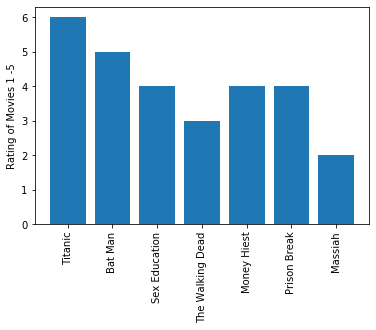

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.bar(movies.index, movies["avg_rating"])

ax.set_xticklabels(movies.index, rotation=90)
ax.set_ylabel("Rating of Movies 1 -5")

plt.show()

#### drop by subsetting

As we can see above rating for the movie 'Titanic' is out of the range, its 6. So to handle this we might just drop it (not recommended) as follows:

In [72]:
import pandas as pd
movies = movies[movies['avg_rating'] <= 5]
movies

,avg_rating
Movie,
Bat Man,5
Sex Education,4
The Walking Dead,3
Money Hiest,4
Prison Break,4
Massiah,2


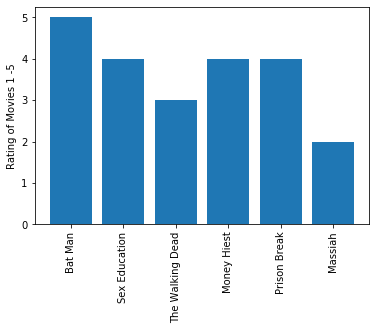

In [73]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.bar(movies.index, movies["avg_rating"])

ax.set_xticklabels(movies.index, rotation=90)
ax.set_ylabel("Rating of Movies 1 -5")

plt.show()

#### drop by .drop() method

We can also drop using `.drop()` method.

In [79]:
import pandas as pd
movies = pd.read_csv('movies.csv')

i =  movies[movies['avg_rating'] > 5].index

print(i)

Int64Index([0], dtype='int64')


Shows only the first element, index = 0 is out of the range.

In [80]:
movies.drop(i, inplace = True)

In [75]:
# Assert results
assert movies['avg_rating'].max() <= 5

In [81]:
movies

,Movie,avg_rating
1,Bat Man,5
2,Sex Education,4
3,The Walking Dead,3
4,Money Hiest,4
5,Prison Break,4
6,Massiah,2


### example: Date  out of range 

In [82]:
import pandas as pd

In [93]:
date = pd.read_csv('date.csv')
date

,Name,age,country,Marital_status,DoB
0,John,23,United States,0,12/5/92
1,Mary,29,Australia,0,19/06/1998
2,Sol,24,Japan,1,17/08/2030
3,Wistler,26,India,2,16/05/2000
4,Maggie,27,Russia,1,13/1/1999
5,Rick,23,Morocco,2,14/12/1990
6,Tom,30,Egypt,3,13/02/1989


#### convert to date time

In [94]:
date['DoB'] = date['DoB'].astype('datetime64[ns]')
date.dtypes

# alternatively

# date['DoB'] = pd.to_datetime(date['DoB'])

Name                      object
age                        int64
country                   object
Marital_status             int64
DoB               datetime64[ns]
dtype: object

In [92]:
import datetime as dt
today_date = dt.date.today()
print(today_date)

2020-05-12


#### Drop the data

Drop any data that is in the future i.e > today

In [99]:
date_update = date[date['DoB'] < today_date]
date_update

C:\Users\bky\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


,Name,age,country,Marital_status,DoB
0,John,23,United States,0,1992-12-05
1,Mary,29,Australia,0,1998-06-19
3,Wistler,26,India,2,2000-05-16
4,Maggie,27,Russia,1,1999-01-13
5,Rick,23,Morocco,2,1990-12-14
6,Tom,30,Egypt,3,1989-02-13


## 3. Uniqueness constraints

WHy do duplicate values happen?

    entry / human error
    
    bug / error in business process
    
    From joining and consolidating data from various sources
   

In [1]:
import pandas as pd

In [9]:
address = pd.read_csv('address.csv')
address.sort_values('Name', ascending=True)

,Name,age,country,Marital_status,Hight_cm,Wt_kg
0,John,23,United States,0,173,62
2,John,23,United States,0,173,62
4,John,23,United States,0,173,70
6,Maggie,27,Russia,1,170,52
1,Mary,29,Australia,0,169,50
7,Rick,23,Morocco,2,175,70
3,Sol,24,Japan,1,183,72
8,Tom,30,Egypt,3,190,70
5,Wistler,26,India,2,169,60


As we can see we have two types of duplicates:

1. complete duplicate, index 2
2. incomplete duplicate, index 4 (treated as non duplicate by the .duplicated method)

#### How do we  find duplicate values?

In [3]:
duplicates = address.duplicated()
print(duplicates)

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool


`.duplicated()` will simply mark on which rows duplicate values exist! i.e it gives as a panda series. We can subset our df using this series to list out duplicate rows.

In [11]:
address[duplicates]

,Name,age,country,Marital_status,Hight_cm,Wt_kg
2,John,23,United States,0,173,62


As we can see here, only the complete duplicate row is returned by the .duplicated() method.

#### The `.duplicated()` method

arguments for the duplicate method:

`subset`: List of column names to check for duplication

`keep ` : Whether to keep first ( `'first'` ), last ( `'last'` ) or all ( `False` ) duplicate values

In [120]:
import pandas as pd

In [15]:
add = pd.read_csv('address.csv')
add.sort_values(by = 'Name')

,Name,age,country,Marital_status,Hight_cm,Wt_kg
0,John,23,United States,0,173,62
2,John,23,United States,0,173,62
4,John,23,United States,0,173,70
6,Maggie,27,Russia,1,170,52
1,Mary,29,Australia,0,169,50
7,Rick,23,Morocco,2,175,70
3,Sol,24,Japan,1,183,72
8,Tom,30,Egypt,3,190,70
5,Wistler,26,India,2,169,60


In [140]:
dup = add.duplicated()   
add[dup]                # prints out only the COMPLETE DUPLICATE

,Name,age,country,Marital_status,Hight_cm,Wt_kg
2,John,23,United States,0,173,62


#### .duplicated(subset = 'Name', keep = False)

subsets duplicates by name

Keep = False  i.e. keep none and consider all values as duplicate value

Keep = 'first' i.e. keep the first value and make the reamining other values as duplicates

keep = 'last' i.e. keep the last value and consider all others as duplicates

In [27]:
uplicates = add.duplicated(subset = ['Hight_cm','Wt_kg'], keep = 'first')

add[uplicates].sort_values(by = 'Name')

,Name,age,country,Marital_status,Hight_cm,Wt_kg
2,John,23,United States,0,173,62


### .drop_duplicates()

takes the same arguments as .duplicated()

`subset` : List of column names to check for duplication.

`keep` : Whether to keep first ( `'first'` ), last ( `'last'` ) or all ( `False` ) duplicate values.

`inplace` : Drop duplicated rows directly inside DataFrame without creating new object ( `True` ).

In [60]:
import pandas as pd
adr = pd.read_csv('address.csv')

In [62]:
# play with it!

adr.drop_duplicates(subset=['Name','Hight_cm','Wt_kg'], keep=False, inplace =False)
adr

,Name,age,country,Marital_status,Hight_cm,Wt_kg
0,John,23,United States,0,173,62
1,Mary,29,Australia,0,169,50
2,John,23,United States,0,173,62
3,Sol,24,Japan,1,183,72
4,John,23,United States,0,173,70
5,Wistler,26,India,2,169,60
6,Maggie,27,Russia,1,170,52
7,Rick,23,Morocco,2,175,70
8,Tom,30,Egypt,3,190,70


### The .groupby() and .agg() methods

In [68]:
import numpy as np

summaries = {'height': 'max', 'weight': 'mean'}

add_aggr = adr.groupby(by='country').agg(np.max).reset_index()
add_aggr

,country,Name,age,Marital_status,Hight_cm,Wt_kg
0,Australia,Mary,29,0,169,50
1,Egypt,Tom,30,3,190,70
2,India,Wistler,26,2,169,60
3,Japan,Sol,24,1,183,72
4,Morocco,Rick,23,2,175,70
5,Russia,Maggie,27,1,170,52
6,United States,John,23,0,173,70


In [67]:
adr.sort_values('country')

,Name,age,country,Marital_status,Hight_cm,Wt_kg
1,Mary,29,Australia,0,169,50
8,Tom,30,Egypt,3,190,70
5,Wistler,26,India,2,169,60
3,Sol,24,Japan,1,183,72
7,Rick,23,Morocco,2,175,70
6,Maggie,27,Russia,1,170,52
0,John,23,United States,0,173,62
2,John,23,United States,0,173,62
4,John,23,United States,0,173,70


# PART-2: TEXT and CATEGORICALDATA PROBLEMS

In [70]:
loc?

Object `loc` not found.


In [ ]:
.loc